In [252]:
import numpy as np 
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression
import seaborn as sns
from sklearn.model_selection import train_test_split

In [253]:
df=pd.read_csv('https://raw.githubusercontent.com/Premalatha-success/Financial-Analytics-Loan-Approval-Prediction/main/loan_prediction.csv')

In [346]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,0,0,5849.0,0.0,128.0,360.0,1.0,2,1
1,LP001003,1,1,1,0,0,4583.0,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1,1,0,0,1,3000.0,0.0,66.0,360.0,1.0,2,1
3,LP001006,1,1,0,1,0,2583.0,2358.0,120.0,360.0,1.0,2,1
4,LP001008,1,0,0,0,0,6000.0,0.0,141.0,360.0,1.0,2,1


In [256]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [257]:
pd.options.display.max_columns=None
pd.options.display.max_rows=None

In [258]:
import warnings
warnings.filterwarnings('ignore')

In [259]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [260]:
df.shape

(614, 13)

In [261]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [262]:
#filling missing values with median
df["LoanAmount"].fillna(df["LoanAmount"].median(),inplace=True)

#filling all nan values with mode of respective variables
df["Gender"].fillna(df["Gender"].mode()[0],inplace=True)
df["Married"].fillna(df["Married"].mode()[0],inplace=True)
df["Dependents"].fillna(df["Dependents"].mode()[0],inplace=True)
df["Self_Employed"].fillna(df["Self_Employed"].mode()[0],inplace=True)
df["Loan_Amount_Term"].fillna(df["Loan_Amount_Term"].mode()[0],inplace=True)
df["Credit_History"].fillna(df["Credit_History"].mode()[0],inplace=True)

In [263]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [264]:
df.head(100)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [265]:
# Import label encoder 
from sklearn import preprocessing
# label_encoder object knows how to understand word labels. 
le= preprocessing.LabelEncoder()
# Encode labels in column 'Country'. 

In [266]:
df["Gender"]=le.fit_transform(df["Gender"])
df["Married"]=le.fit_transform(df["Married"])
df["Education"]=le.fit_transform(df["Education"])
df["Self_Employed"]=le.fit_transform(df["Self_Employed"])
df["Property_Area"]=le.fit_transform(df["Property_Area"])
df["Loan_Status"]=le.fit_transform(df["Loan_Status"])
df.head(100)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,0,0,5849,0.0,128.0,360.0,1.0,2,1
1,LP001003,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,LP001006,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,LP001008,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1
5,LP001011,1,1,2,0,1,5417,4196.0,267.0,360.0,1.0,2,1
6,LP001013,1,1,0,1,0,2333,1516.0,95.0,360.0,1.0,2,1
7,LP001014,1,1,3+,0,0,3036,2504.0,158.0,360.0,0.0,1,0
8,LP001018,1,1,2,0,0,4006,1526.0,168.0,360.0,1.0,2,1
9,LP001020,1,1,1,0,0,12841,10968.0,349.0,360.0,1.0,1,0


In [267]:
df.dtypes

Loan_ID               object
Gender                 int32
Married                int32
Dependents            object
Education              int32
Self_Employed          int32
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area          int32
Loan_Status            int32
dtype: object

In [268]:
df["Dependents"]=le.fit_transform(df["Dependents"])

In [269]:
df.shape

(614, 13)

In [270]:
numerical_columns=['ApplicantIncome','CoapplicantIncome','LoanAmount']

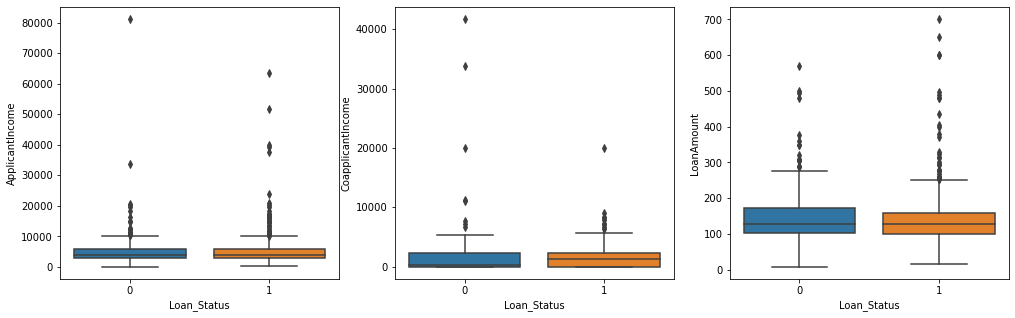

In [271]:
fig,axes = plt.subplots(1,3,figsize=(17,5))
for idx,cat_col in enumerate(numerical_columns):
    
    sns.boxplot(y=cat_col,data=df,x='Loan_Status',ax=axes[idx])


plt.subplots_adjust(hspace=1)

In [272]:
#outlier treatment
def remove_outlier(col):
    sorted(col)
    Q1,Q3=col.quantile([0.25,0.75])
    IQR=Q3-Q1
    lower_range=Q1-(1.5*IQR)
    upper_range=Q3+(1.5*IQR)
    return lower_range,upper_range

In [273]:
low,upp=remove_outlier(df['ApplicantIncome'])
df["ApplicantIncome"]=np.where(df['ApplicantIncome']>upp,upp,df['ApplicantIncome'])
df["ApplicantIncome"]=np.where(df['ApplicantIncome']<low,low,df['ApplicantIncome'])

In [274]:
low,upp=remove_outlier(df['CoapplicantIncome'])
df["CoapplicantIncome"]=np.where(df['CoapplicantIncome']>upp,upp,df['CoapplicantIncome'])
df["CoapplicantIncome"]=np.where(df['CoapplicantIncome']<low,low,df['CoapplicantIncome'])

In [275]:
low,upp=remove_outlier(df['LoanAmount'])
df["LoanAmount"]=np.where(df['LoanAmount']>upp,upp,df['LoanAmount'])
df["LoanAmount"]=np.where(df['LoanAmount']<low,low,df['LoanAmount'])

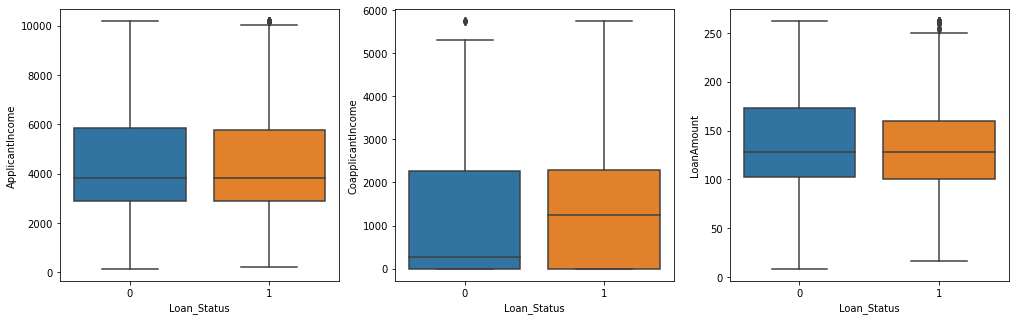

In [276]:
fig,axes = plt.subplots(1,3,figsize=(17,5))
for idx,cat_col in enumerate(numerical_columns):
    
    sns.boxplot(y=cat_col,data=df,x='Loan_Status',ax=axes[idx])


plt.subplots_adjust(hspace=1)

In [278]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report                    

In [279]:
from sklearn import metrics
predictions=model.predict(x_test)
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,predictions)

array([[ 11,  50],
       [ 13, 111]], dtype=int64)

<AxesSubplot:>

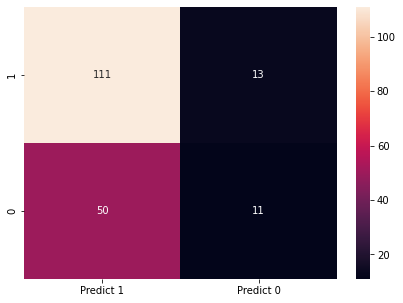

In [280]:
cm=metrics.confusion_matrix(y_test, predictions, labels=[1, 0])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm,annot=True,fmt='g')

In [281]:
TP=122
FP=37
FN=2
TN=24

In [282]:
(TP+TN)/(TP+TN+FP+FN)

0.7891891891891892

In [283]:
metrics.accuracy_score(y_test,predictions)

0.6594594594594595

In [284]:
#missclassification
(FP+FN)/(TP+TN+FP+FN)

0.21081081081081082

In [285]:
1-(metrics.accuracy_score(y_test,predictions))

0.3405405405405405

In [286]:
(TP)/(TP+FN)

0.9838709677419355

In [287]:
metrics.recall_score(y_test,predictions)

0.8951612903225806

In [288]:
#specificity
(TP)/(TP+FP)

0.7672955974842768

In [289]:
metrics.precision_score(y_test,predictions)

0.6894409937888198

In [290]:
#fpr
(FP)/(TN+FP)

0.6065573770491803

In [294]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [295]:
from sklearn.linear_model import LogisticRegression
log_classifier=LogisticRegression()
log_classifier.fit(x_train, y_train)
ytrain_pred = log_classifier.predict_proba(x_train)
print('Logistic train roc-auc: {}'.format(roc_auc_score(y_train, ytrain_pred[:,1])))
ytest_pred = log_classifier.predict_proba(x_test)
print('Logistic test roc-auc: {}'.format(roc_auc_score(y_test, ytest_pred[:,1])))

Logistic train roc-auc: 0.7640504124186689
Logistic test roc-auc: 0.7383659439450027


In [296]:
ytrain_pred

array([[0.20491678, 0.79508322],
       [0.04989537, 0.95010463],
       [0.63174236, 0.36825764],
       [0.84581045, 0.15418955],
       [0.2402776 , 0.7597224 ],
       [0.35305158, 0.64694842],
       [0.22226512, 0.77773488],
       [0.25173846, 0.74826154],
       [0.18231663, 0.81768337],
       [0.15066643, 0.84933357],
       [0.8228915 , 0.1771085 ],
       [0.24921048, 0.75078952],
       [0.18591015, 0.81408985],
       [0.33900844, 0.66099156],
       [0.18372137, 0.81627863],
       [0.19142658, 0.80857342],
       [0.10543824, 0.89456176],
       [0.26005686, 0.73994314],
       [0.17555438, 0.82444562],
       [0.17853178, 0.82146822],
       [0.21548743, 0.78451257],
       [0.23456825, 0.76543175],
       [0.89391472, 0.10608528],
       [0.18752401, 0.81247599],
       [0.14452998, 0.85547002],
       [0.23527914, 0.76472086],
       [0.1569764 , 0.8430236 ],
       [0.3212054 , 0.6787946 ],
       [0.11162861, 0.88837139],
       [0.79234138, 0.20765862],
       [0.

In [297]:
log_classifier.score(x_train, y_train)

0.8181818181818182

In [298]:
log_classifier.score(x_test, y_test)

0.7891891891891892

In [299]:
from sklearn.neighbors import KNeighborsClassifier
knn_classifier=KNeighborsClassifier()
knn_classifier.fit(x_train, y_train)
ytrain_pred = knn_classifier.predict_proba(x_train)
print('Adaboost train roc-auc: {}'.format(roc_auc_score(y_train, ytrain_pred[:,1])))
ytest_pred = knn_classifier.predict_proba(x_test)
print('Adaboost test roc-auc: {}'.format(roc_auc_score(y_test, ytest_pred[:,1])))

Adaboost train roc-auc: 0.7779343204057586
Adaboost test roc-auc: 0.575753569539926


In [300]:
knn_classifier.score(x_train,y_train)             

0.7552447552447552

In [301]:
knn_classifier.score(x_test,y_test) 

0.6594594594594595

In [302]:
## Apply RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier()
rf_model.fit(x_train, y_train)
ytrain_pred = rf_model.predict_proba(x_train)
print('RF train roc-auc: {}'.format(roc_auc_score(y_train, ytrain_pred[:,1])))
ytest_pred = rf_model.predict_proba(x_test)
print('RF test roc-auc: {}'.format(roc_auc_score(y_test, ytest_pred[:,1])))

RF train roc-auc: 0.9999999999999999
RF test roc-auc: 0.7720121628767849


In [303]:
rf_model.score(x_train,y_train)

1.0

In [304]:
rf_model.score(x_test,y_test)

0.7675675675675676

In [305]:
pred=[]
for model in [rf_model,log_classifier,knn_classifier]:
    pred.append(pd.Series(model.predict_proba(x_test)[:,1]))
final_prediction=pd.concat(pred,axis=1).mean(axis=1)
print('Ensemble test roc-auc: {}'.format(roc_auc_score(y_test,final_prediction)))

Ensemble test roc-auc: 0.7907191961924908


In [306]:
pd.concat(pred,axis=1)

,0,1,2
0,0.69,0.738558,0.2
1,0.89,0.756202,0.8
2,0.71,0.826201,0.8
3,0.42,0.684385,0.6
4,0.98,0.810717,0.8
5,0.18,0.086012,1.0
6,0.90,0.901646,0.6
7,0.41,0.681632,0.0
8,0.97,0.686810,0.8
9,0.10,0.133477,0.8


In [307]:
final_prediction

0      0.542853
1      0.815401
2      0.778734
3      0.568128
4      0.863572
5      0.422004
6      0.800549
7      0.363877
8      0.818937
9      0.344492
10     0.798763
11     0.743940
12     0.833972
13     0.725679
14     0.837848
15     0.847363
16     0.896139
17     0.900510
18     0.870618
19     0.813111
20     0.704181
21     0.742190
22     0.884902
23     0.754652
24     0.830374
25     0.759871
26     0.756996
27     0.372817
28     0.901197
29     0.653611
30     0.599536
31     0.668875
32     0.503430
33     0.307271
34     0.897727
35     0.794117
36     0.793193
37     0.733648
38     0.861422
39     0.706927
40     0.836621
41     0.796669
42     0.764712
43     0.881398
44     0.907095
45     0.904045
46     0.724500
47     0.276895
48     0.772092
49     0.842040
50     0.693484
51     0.565068
52     0.899216
53     0.661442
54     0.918457
55     0.312070
56     0.733376
57     0.318531
58     0.810463
59     0.575706
60     0.722808
61     0.728167
62     0

In [308]:
#### Calculate the ROc Curve
fpr, tpr, thresholds = roc_curve(y_test, final_prediction)
thresholds

array([1.93678223, 0.93678223, 0.88338286, 0.88139822, 0.83784761,
       0.83662118, 0.83397232, 0.83202991, 0.83125619, 0.83037352,
       0.8206594 , 0.81961888, 0.8175445 , 0.8166864 , 0.81311139,
       0.81146273, 0.81083503, 0.81046265, 0.80955577, 0.80675774,
       0.8053084 , 0.80292564, 0.79876271, 0.79623213, 0.77535697,
       0.77330178, 0.77209222, 0.76471215, 0.75699572, 0.75465233,
       0.750996  , 0.74575428, 0.7404025 , 0.73609876, 0.7336479 ,
       0.7333759 , 0.7247011 , 0.72450026, 0.71348492, 0.71215288,
       0.70060239, 0.69909676, 0.69790769, 0.69657099, 0.68594512,
       0.67999826, 0.67196458, 0.66887487, 0.65891396, 0.65333198,
       0.64036846, 0.62322429, 0.59953556, 0.59838593, 0.58743478,
       0.56812831, 0.56506845, 0.55686961, 0.5462738 , 0.5428527 ,
       0.46752359, 0.38334433, 0.37281685, 0.36648103, 0.36387746,
       0.19871276])

In [309]:
from sklearn.metrics import accuracy_score
accuracy_ls = []
for thres in thresholds:
    y_pred = np.where(final_prediction>thres,1,0)
    accuracy_ls.append(accuracy_score(y_test, y_pred, normalize=True))
    
accuracy_ls = pd.concat([pd.Series(thresholds), pd.Series(accuracy_ls)],
                        axis=1)
accuracy_ls.columns = ['thresholds', 'accuracy']
accuracy_ls.sort_values(by='accuracy', ascending=False, inplace=True)
accuracy_ls.head()

,thresholds,accuracy
60,0.467524,0.789189
55,0.568128,0.783784
59,0.542853,0.783784
53,0.598386,0.783784
57,0.556870,0.783784


In [310]:
accuracy_ls

,thresholds,accuracy
60,0.467524,0.789189
55,0.568128,0.783784
59,0.542853,0.783784
53,0.598386,0.783784
57,0.556870,0.783784
54,0.587435,0.783784
50,0.640368,0.778378
47,0.668875,0.778378
48,0.658914,0.778378
49,0.653332,0.778378


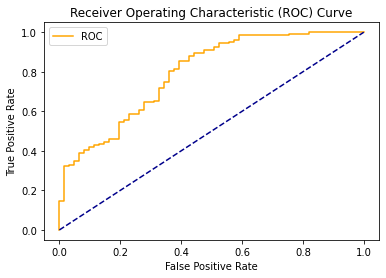

In [311]:
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()
plot_roc_curve(fpr,tpr)

In [359]:
threshold = 0.467524
y_pred = (knn_classifier.predict_proba(x_test)[:, 1] > threshold).astype('float')
y_pred1 = (knn_classifier.predict_proba(x_train)[:, 1] > threshold).astype('float')
confusion_matrix(y_test, y_pred)

array([[ 11,  50],
       [ 13, 111]], dtype=int64)

In [360]:
from sklearn.neighbors import KNeighborsClassifier
knn_classifier=KNeighborsClassifier()
knn_classifier.fit(x_train, y_train)
ytrain_pred = knn_classifier.predict_proba(x_train)
print('Adaboost train roc-auc: {}'.format(roc_auc_score(y_train,y_pred1)))
ytest_pred = knn_classifier.predict_proba(x_test)
print('Adaboost test roc-auc: {}'.format(roc_auc_score(y_test, y_pred)))

Adaboost train roc-auc: 0.6441544136482402
Adaboost test roc-auc: 0.5377445795875198


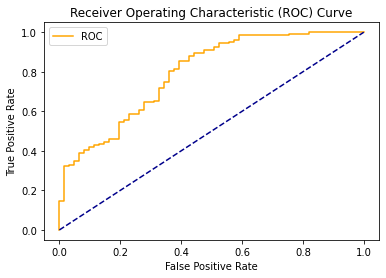

In [361]:
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()
plot_roc_curve(fpr,tpr)

In [349]:
y_pred

array([0., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 0., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 0., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 0.,
       1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1., 1., 1.,
       1., 0., 1., 1., 1., 1., 1., 1., 0., 0., 1., 1., 1., 1., 1., 0., 0.,
       1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 0., 0.])

In [351]:
threshold =0.467524
y_pred = (rf_model.predict_proba(x_test)[:, 1] > threshold).astype('float')
y_pred1 = (rf_model.predict_proba(x_train)[:, 1] > threshold).astype('float')
confusion_matrix(y_test, y_pred)
confusion_matrix(y_train, y_pred1)

array([[131,   0],
       [  0, 298]], dtype=int64)

In [352]:
## Apply RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier()
rf_model.fit(x_train, y_train)
ytrain_pred = rf_model.predict_proba(x_train)
print('RF train roc-auc: {}'.format(roc_auc_score(y_train,y_pred1 )))
ytest_pred = rf_model.predict_proba(x_test)
print('RF test roc-auc: {}'.format(roc_auc_score(y_test,y_pred )))

RF train roc-auc: 1.0
RF test roc-auc: 0.6807244843997885


In [353]:
threshold =0.467524
y_pred = (log_classifier.predict_proba(x_test)[:, 1] > threshold).astype('float')
y_pred1 = (log_classifier.predict_proba(x_train)[:, 1] > threshold).astype('float')
confusion_matrix(y_test, y_pred)
confusion_matrix(y_train, y_pred1)

array([[ 58,  73],
       [  5, 293]], dtype=int64)

In [355]:
from sklearn.linear_model import LogisticRegression
log_classifier=LogisticRegression()
log_classifier.fit(x_train, y_train)
ytrain_pred = log_classifier.predict_proba(x_train)
print('Logistic train roc-auc: {}'.format(roc_auc_score(y_train,y_pred1 )))
ytest_pred = log_classifier.predict_proba(x_test)
print('Logistic test roc-auc: {}'.format(roc_auc_score(y_test, y_pred)))

Logistic train roc-auc: 0.7129847840565602
Logistic test roc-auc: 0.6886567953463776
